*This is a translated (and extended in some places) version of the original titanic-solution-a-beginner-s-guide *

# TITANIC SOLUTION (translated into RU)
### Руководство для начинающих
- [Разедочный анализ и визуализация](#title1) (Exploratory Data Analysis (EDA) with Visualization)
- [Выделение признаков](#title2) (Feature Extraction)
- [Моделирование](#title3) (Data Modelling)
- [Предсказания / Вычисления по моделям](#title4) (Model Evaluation)
- [Ансамбли моделей](#title5)

|   |   |   |   |
|---|---|---|---|
|![](https://pandas.pydata.org/_static/pandas_logo.png)|![](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)|![](https://numpy.org/_static/numpy_logo.png)|![](https://matplotlib.org/_static/logo2.png)|

-------

## Подключение зависимостей / Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # устанавливаем seaborn как по-умолчанию для отрисовки графиков

### Загрузка датасетов
В состав предлагаемого датасеты включены 2 набора данных:
* Обучающий (```train```) 
* Тестовый (```test```)

Их нужно загрузить в локальные переменные. Загружаем обучающий и тестовый наборы данных с помощью библиотеки ```pandas```, она же - ```pd``` в нашем примере. Для этого используем стандартные метод ```.read_csv(..)```, принимающий на вход путь к файлу с данными.


In [2]:
train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')

## Разведочный (исследовательский) анализ <a class="anchor" id="title1"></a>
### Исследуем обучающий набор (train)
Анализ данных и, вообще их исследование, начинается с того, что **просто** глазами **смотрим** на то, что находится внутри .csv файлов. Для этого достаточно вывести на экран первые несколько строк загруженных таблиц. 

Метод ```.head()``` поможет нам в этом. С его помощью печатаем первые 5 строк из обучающей выборки (**train dataset**):

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Результат работы функции - предпросмотр загруженных данных. Рассмотрим внимательнее, что содержится в данном датасете. Ниже представлена краткая информация о каждом из стобцов датасета:

1. **PassengerId:** Уникальный индекс/номер строки. Начинается с 1 (для первой строки) и увеличивается на 1 для каждой следующей. Рассматриваем его как индентификатор строки и, что логично, идентификатор пассжира (т.к. для каждого пассажира в датасете представлена только одна строка).
2. **Survived:** Признак, показывающий был ли спасен данный пассажир или нет. 1 означает, что удалось выжить, и 0 - не удалось спастись.
3. **Pclass:** Класс билета. 1 - означает Первый класс билета. 2 - означает Второй класс билета. 3 - означает Третий класс билета.
4. **Name:** Имя пассажира. Имя также может содержать титулы и обращения. "Mr" для мужчин. "Mrs" для женщин. "Miss" для девушек (тут имеется в виду что для тех, кто не замужем, так было принято, да и сейчас тоже, говорить в западном обществе). "Master" для юношей.
5. **Sex:** Пол пассажира. Либо мужчины (=Male) оибо женщины (=Female).
6. **Age:** Возраст пассажира. "NaN" значения в этой колонке означают, что возраст данного пассажира отсутствует/неизвестен/или не был записанv в датасет.
7. **SibSp:** Количество братьев/сестер или супругов, путешествующих с каждым пассажиром.
8. **Parch:** Количество родителей детей (Number of parents of children travelling with each passenger).
9. **Ticket:** Номер билета.
10. **Fare:** Сумма, которую заплатил пассажир за путешествие.
11. **Cabin:** Номер каюты пассажира. "NaN" значения в этой колонке указавает на то, что номер каюты данного пассажира не был записан.
12. **Embarked:** Порт отправления данного пассажира.

##### Общее количество записей и столбцов

Помимо примеров данных, нам нужно понимать размерности, т.е. сколько всего строк/столбцов присутсвует в загруженных файлах. 

Свойство ```.shape``` возвращает данную информацию. Так, мы видим, что всего в обучающем наборе содержатся 891 строка/запись и 12 столбцов.

In [4]:
train.shape

(700, 12)

##### Описание обучающего набора

```.describe()``` 
отобразит различные величины, такие как _количесmво_, _среднее_, _среднеквадратичное отклонение_ и т.д. для **численных** типов данных.

Это может быть полезным для понимания распределения значений по датасету и статистики, особенно когда нет возможности просмотреть все записи в виду огромного их количества (_датасет Титаник к ним не относится, т.к. даже 1000 строчек при желании можно просмотреть глазами_). 

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,700.00000,700.000000,700.000000,555.000000,700.000000,700.000000,700.000000
mean,350.50000,0.387143,2.310000,30.041892,0.532857,0.385714,32.220416
std,202.21688,0.487445,0.835317,14.678331,1.071309,0.818122,48.281945
min,1.00000,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,175.75000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,350.50000,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,525.25000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,700.00000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


```.describe(include = ['O'])``` 
отобразит статистики (descriptive statistics) объектного типа. Это нужно для нечисловых данных, когда нельзя просто посчитать максимумы/среднее/и пр. для данных. Мы можем отнести такие данные к категориальному виду.

In [6]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,700,700,700,157,699
unique,700,2,559,119,3
top,"Braund, Mr. Owen Harris",male,CA 2144,G6,S
freq,1,449,6,4,502


Давайте проанализируем:
* Видно, что сущесвуют дубликаты номеров билетов *Ticket* и переиспользуются каюты *Cabins* (уникальных записей (_unique_) меньше, чем общего количества). Самый большой порядок дубликата билета - "CA. 2343". Он повторился  7 раз. Аналогично, наибОльшее число людей, занимающих одну и ту же каюту - 4. Они используют каюты "C23 C25 C27".
* Также можно заметить, что 644 человека отбыли из порта "S".
* Среди 891 записей, 577 были мужчины (Male) и оставшием женщины (Female).

Используем метод ```.info()```, чтобы увидеть больше информацию о типах данных/структуре в тренировочной выборке.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  700 non-null    int64  
 1   Survived     700 non-null    int64  
 2   Pclass       700 non-null    int64  
 3   Name         700 non-null    object 
 4   Sex          700 non-null    object 
 5   Age          555 non-null    float64
 6   SibSp        700 non-null    int64  
 7   Parch        700 non-null    int64  
 8   Ticket       700 non-null    object 
 9   Fare         700 non-null    float64
 10  Cabin        157 non-null    object 
 11  Embarked     699 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 65.8+ KB


* Можно увидеть, что значение *Age* не задано для большого количества записей. 
* Из 891 строк, возраст *Age* задан лишь для 714 записей.
* Аналогично, Каюты *Cabin* также пропущены для большого количества записей. Только 204 из 891 записей содержат *Cabin* значения.

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            145
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          543
Embarked         1
dtype: int64

* Всего 177 записей с пропущенным возрастом (*Age*), 
* 687 записей с пропущенным значение каюты *Cabin* 
* и для 2 записей не заданы порты отправления *Embarked*.

> Результатом проведенного анализа является понимание того, насколько полны данные или нет в заданых датасетах, нужно ли проводитьб до-наполнение данных, можно ли использовать эти данные напрямую и пр.

### Исследуем тестовый датасет (test)

Тестовый набор содержит 418 строк и 11 столбцов.

> Записей в Обучающем наборе = 891
>
> Записей в Тестовом наборе = 418
>
> Всего записей = 891+418 = 1309

Можно увидеть, что около 2/3 от общего количества данных - данные из обучающей выборки (*Train*) и около 1/3 всех данных - тестовые (*Test*).

In [9]:
test.shape

(191, 12)

*Survived* стобец отсутствует в Тестовом наборе.
Мы должны натренировать наш классификатор, используя Тестовый набор и сгенерировать предсказания (*Survived*) для Тестовых данных.

In [10]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
1,702,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S
2,703,0,3,"Barbara, Miss. Saiide",female,18.0,0,1,2691,14.4542,NaN,C
3,704,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,NaN,Q
4,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  191 non-null    int64  
 1   Survived     191 non-null    int64  
 2   Pclass       191 non-null    int64  
 3   Name         191 non-null    object 
 4   Sex          191 non-null    object 
 5   Age          159 non-null    float64
 6   SibSp        191 non-null    int64  
 7   Parch        191 non-null    int64  
 8   Ticket       191 non-null    object 
 9   Fare         191 non-null    float64
 10  Cabin        47 non-null     object 
 11  Embarked     190 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.0+ KB


* Есть отсутствующие данные для возраста (*Age*) и в Тестовом наборе тоже.

* Из 418 записей в Тестовом наборе , только в 332 строках присутствует возраст (*Age*).

* *Cabin* также отсутсвуют в большом колчиестве записей. Только 91 строка из 418 содержать значения для поля *Cabin*.

In [12]:
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             32
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          144
Embarked         1
dtype: int64

Всего 86 записей с пропущенным Возрастом (*Age*), 327 записей с пропущенными Каютами (*Cabin*) и 1 записьс пропущенной информацией о Цене *Fare*.

### Зависимости между Признаками (Features) и Ответом (Survival)

В этом разделе, мы анализируем зависимости между разными признаками по отношению к Спасению(*Survival*). Мы увидии как разные значения признакоы отображают разные шансы на спасение. Мы также построим разные виды диаграмм, для того, чтобы **представить** наши данные и находки.

In [13]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(train)*100.0))
print ("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(train)*100.0))
print ("Total: %i"%len(train))

Survived: 271 (38.7%)
Not Survived: 429 (61.3%)
Total: 700


#### Pclass vs. Survival

Пассажиры более высокого класса имеют бОльшие шансы на спасение.

In [14]:
train.Pclass.value_counts()

Pclass
3    386
1    169
2    145
Name: count, dtype: int64

In [15]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           102
        0            67
2       0            74
        1            71
3       0           288
        1            98
Name: count, dtype: int64

In [16]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.603550
1,2,0.489655
2,3,0.253886


<Axes: xlabel='Pclass', ylabel='Survived'>

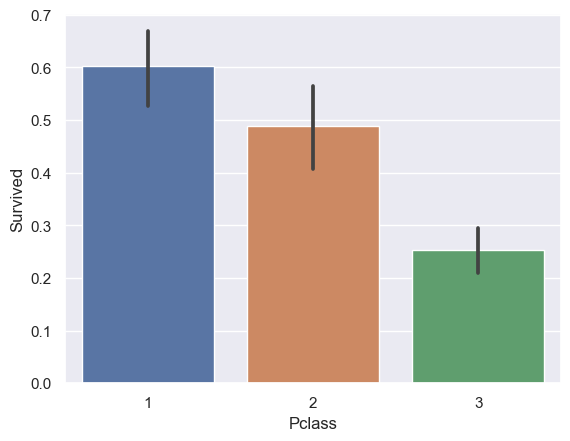

In [17]:
#train.groupby('Pclass').Survived.mean().plot(kind='bar')
sns.barplot(x='Pclass', y='Survived', data=train)

#### Sex vs. Survival

Женщины имеют бОльшие шансы на спасение.

In [18]:
train.Sex.value_counts()

Sex
male      449
female    251
Name: count, dtype: int64

In [19]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           186
        0            65
male    0           364
        1            85
Name: count, dtype: int64

In [20]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.741036
1,male,0.189310


<Axes: xlabel='Sex', ylabel='Survived'>

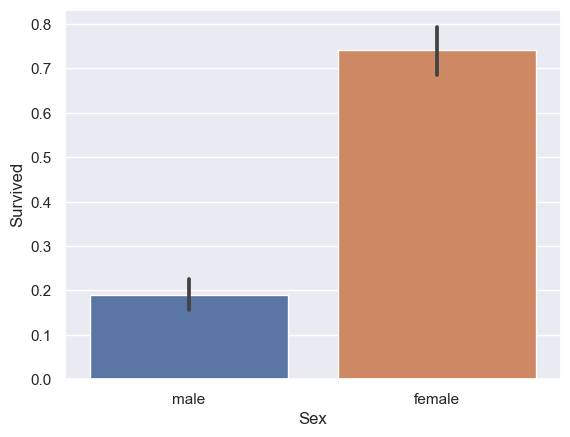

In [21]:
#train.groupby('Sex').Survived.mean().plot(kind='bar')
sns.barplot(x='Sex', y='Survived', data=train)

#### Pclass & Sex vs. Survival

Ниже, мы просто находим, сколько мужчин и женщин в каждом Классе (*Pclass*). Затем мы строим столбцовую диаграмму с полученной информацией . Мы обнаруживамем, что среди пассажиров 3 Класса больше мужчин.

Sex     female  male
Pclass              
1           70    99
2           61    84
3          120   266


Text(0, 0.5, 'Percentage')

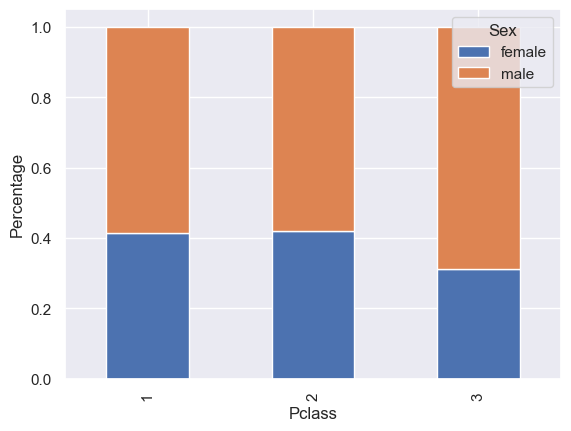

In [22]:
tab = pd.crosstab(train['Pclass'], train['Sex'])
print (tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

Из графика выше, можем видеть, что :
- Женщины из 1го и 2го Классов (Pclass) имеют практически 100% шансы на спасение. 
- Мужчины из 2го и 3го Классов (Pclass) имеют только около 10% шансов на спасене.

-------
### Задание для самостоятельной работы

Необходимо построить и качественно проанализировать (самостоятельно) следующие зависимости в данных:
* [ ] Embarked vs. Survival
* [ ] Pclass vs. Embarked vs. Survival
* [ ] Parch vs. Survival
* [ ] SibSp vs. Survival
* [ ] Age vs. Survival
-------

#### Pclass, Sex & Embarked vs. Survival

C:\Users\hotf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hotf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


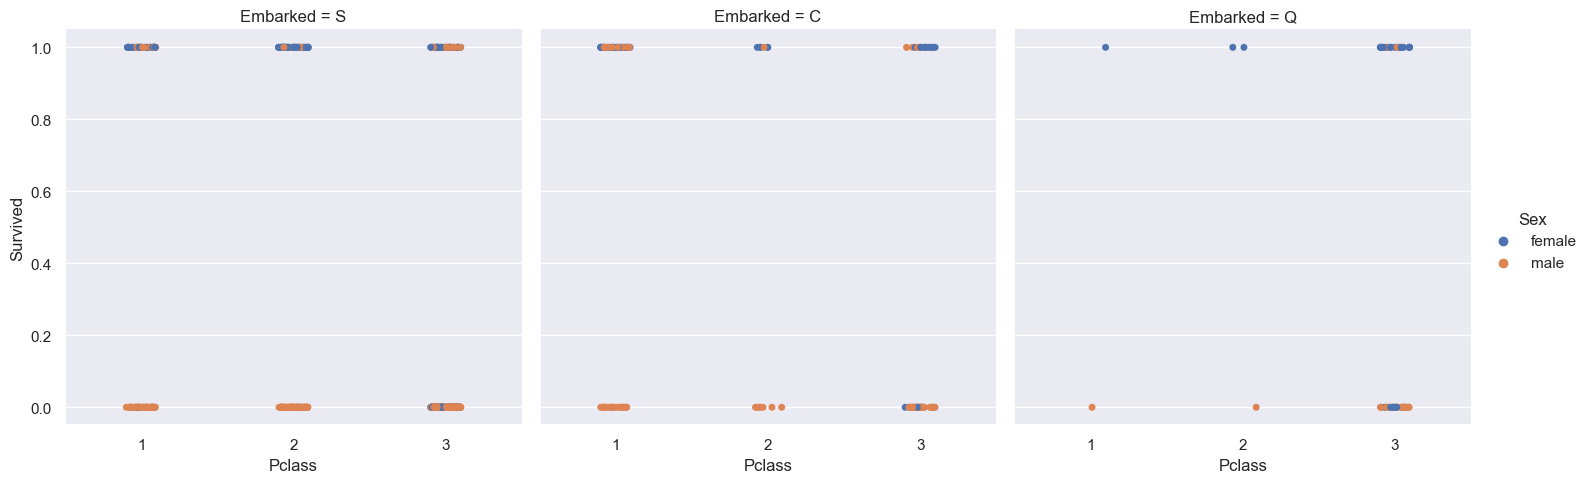

In [23]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train)

Из этого графика можно увидеть, что :
- Почти все женщины из 1го и 2го Класса спаслись.
- Жертвы серди женщин были в основном из 3 класса.
- Мужчины только из 1 класса имеют несколько большие шансы на спасение, чем из 2го и 3го Классов.

Давайте посмотрим, есть ли какая-либо зависимость от пунтка отправления. Для этого необходимо обратиться к карте следования Титаника. S - порт Саутгемптона, является первым на пути следования, С - Шербург - второй порт посадки пассажиров, Q - Квинстаун - последний по пути отправления.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/%28ru%29_Titanic_voyage_map.svg/1920px-%28ru%29_Titanic_voyage_map.svg.png)

Есть ли какая-то зависимость от порта посадки? Исходя из графиков мы видим, что вероятность спасения женщин увеличивается по всем классам пассажирова с более поздним портом посадки. У мужчин эта логика не срабатывает для порта Квинстауна только. Вполне возможно, что это связано с загрузкой пассажиров, когда более поздние занимают места на более высоких палубах (аналогия - погрузка пассажиров в самолет), чтобы и центр масс был ниже и последующие пассажиры не мешалии не проходили мимо уже расположившихся.

#### Embarked vs. Survived

In [24]:
train.Embarked.value_counts()

Embarked
S    502
C    134
Q     63
Name: count, dtype: int64

In [25]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            72
          0            62
Q         0            35
          1            28
S         0           332
          1           170
Name: count, dtype: int64

In [26]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.537313
1,Q,0.444444
2,S,0.338645


<Axes: xlabel='Embarked', ylabel='Survived'>

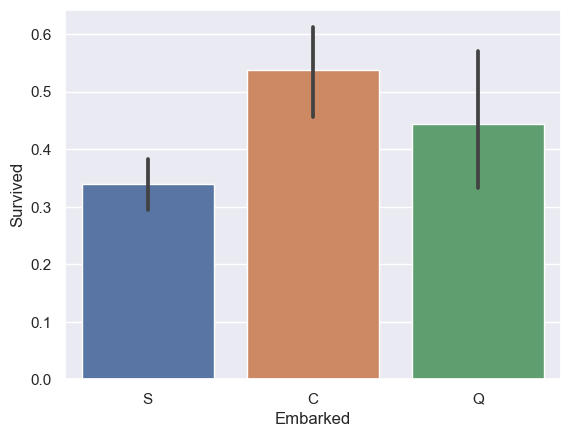

In [27]:
#train.groupby('Embarked').Survived.mean().plot(kind='bar')
sns.barplot(x='Embarked', y='Survived', data=train)

#### Parch vs. Survival

In [28]:
train.Parch.value_counts()

Parch
0    533
1     90
2     66
5      4
4      4
3      2
6      1
Name: count, dtype: int64

In [29]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           344
       1           189
1      1            46
       0            44
2      1            34
       0            32
3      0             1
       1             1
4      0             4
5      0             3
       1             1
6      0             1
Name: count, dtype: int64

In [30]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.354597
1,1,0.511111
2,2,0.515152
3,3,0.500000
4,4,0.000000
5,5,0.250000
6,6,0.000000


C:\Users\hotf\AppData\Local\Temp\ipykernel_3800\814652768.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Parch', y='Survived', ci=None, data=train) # ci=None will hide the error bar


<Axes: xlabel='Parch', ylabel='Survived'>

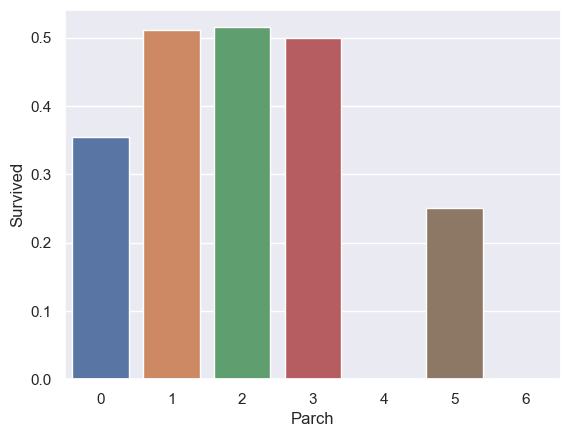

In [31]:
#train.groupby('Parch').Survived.mean().plot(kind='bar')
sns.barplot(x='Parch', y='Survived', ci=None, data=train) # ci=None will hide the error bar

#### SibSp vs. Survival

In [32]:
train.SibSp.value_counts()

SibSp
0    471
1    166
2     26
3     14
4     14
5      5
8      4
Name: count, dtype: int64

In [33]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           305
       1           166
1      1            87
       0            79
2      0            14
       1            12
3      0            11
       1             3
4      0            11
       1             3
5      0             5
8      0             4
Name: count, dtype: int64

In [34]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.352442
1,1,0.524096
2,2,0.461538
3,3,0.214286
4,4,0.214286
5,5,0.000000
6,8,0.000000


C:\Users\hotf\AppData\Local\Temp\ipykernel_3800\895798821.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SibSp', y='Survived', ci=None, data=train) # ci=None will hide the error bar


<Axes: xlabel='SibSp', ylabel='Survived'>

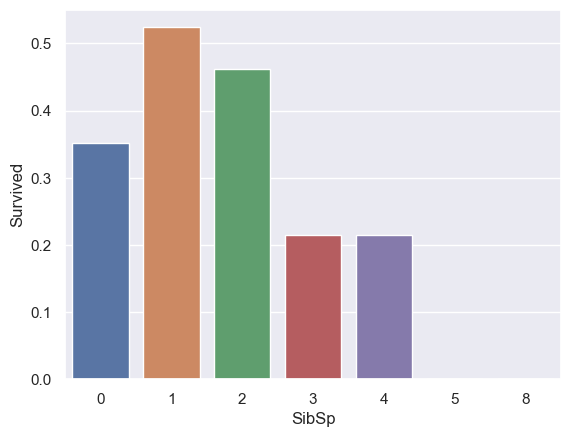

In [35]:
#train.groupby('SibSp').Survived.mean().plot(kind='bar')
sns.barplot(x='SibSp', y='Survived', ci=None, data=train) # ci=None will hide the error bar

#### Age vs. Survival

<Axes: xlabel='Sex', ylabel='Age'>

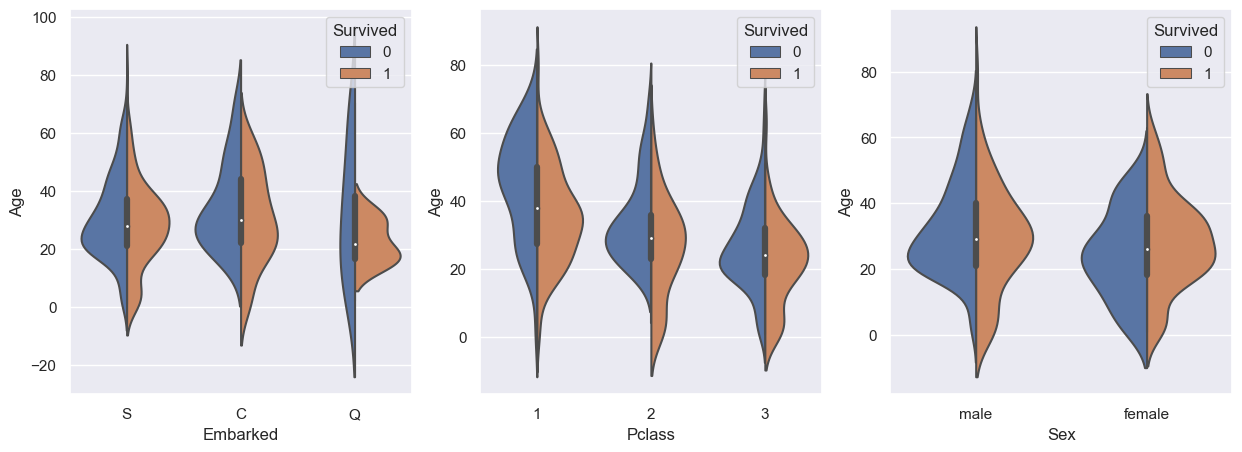

In [36]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train, split=True, ax=ax3)

Из графика (```.violinplot(..)```) по переменной *Pclass* можно увидеть, что:
- 1st Pclass пассажиры имеют очень маль детей по сравнению с двумя другими классами.
- 1st Plcass пассажиры по возрасту намного старше по сравнению с двумя другими классами.
- Почти все дети (в возрасте от 0 до 10) пассажиров 2го класса спаслись.
- Большинству детей пассажиров 3го класса удалось спастись.
- Более молодые люди из первого класса спасались по сравнению к более пожилым.

Из графика (=violinplot) по полу *Sex* можно увидеть, что:
- Большинство детей мужского пола (в возрасте от 0 до 14) спаслись.
- Девушки и жещины в возрасте от 18 до 40 имели (в оригинале - имеют) больший шанс на спасение.

C:\Users\hotf\AppData\Local\Temp\ipykernel_3800\2391060619.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
C:\Users\hotf\AppData\Local\Temp\ipykernel_3800\2391060619.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

<Axes: xlabel='Male Age'>

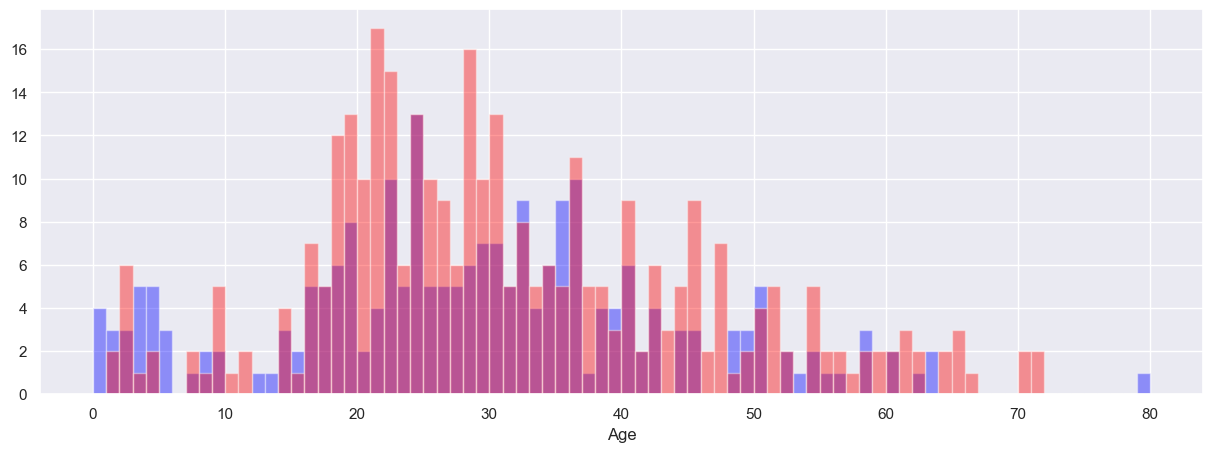

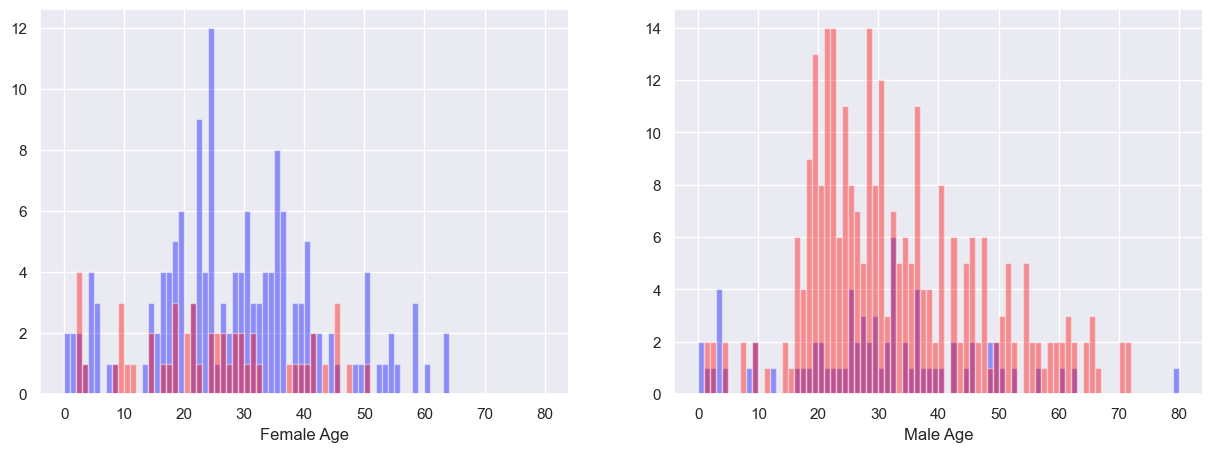

In [37]:
total_survived = train[train['Survived']==1]
total_not_survived = train[train['Survived']==0]
male_survived = train[(train['Survived']==1) & (train['Sex']=="male")]
female_survived = train[(train['Survived']==1) & (train['Sex']=="female")]
male_not_survived = train[(train['Survived']==0) & (train['Sex']=="male")]
female_not_survived = train[(train['Survived']==0) & (train['Sex']=="female")]

plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Age')

plt.figure(figsize=[15,5])

plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(female_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Female Age')

plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(male_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Male Age')


Из графиков сверху следует, что:
- Объединя вместе пассажирова мужского и женского полов, можно заметить, что дети в возрасте от 0 до 5 лет имеют больше шансов на спасение.
- Девушки/Женщины в возрасте от "18 до 40" и "старше 50" имеют более высокие шансы.
- Мальчики/Юноши в возрасте от 0 до 14 имеют большие шансы на спасение.

### Корреляция признаков

*Что нам это дает?* - с помощью подобного инструмента мы можем оценить зависимости между данными. Так "тепловая" карта корреляций разных признаков отображает:

> **Положительные** значение = Положительные корреляция, т.е. возрастание по одному признаку соответсвует возрастанию по другому признаку и наоборот.
>
> **Орицательные** значения = Обратные/Негативные корреляции, т.е. возрастание по одному признаку, влечет уменьшение иного, и наоборот.

В нашем случае, мы фокусируемся на тех признаках, которые имеют сильные положительные и отрицательные корреляции с признаком *Survived*. 

>Почему?  Потому что это означает, что прогнозирование значения *Survived* (а именно это и надо предсказать) имеет прямую зависимость с признакми с положительное корреляцией, и обратную - с отрицательными, т.о. если мы инвертируем обратные значения, то они тоже перейдут в разряд положительных корреляций.

<Axes: >

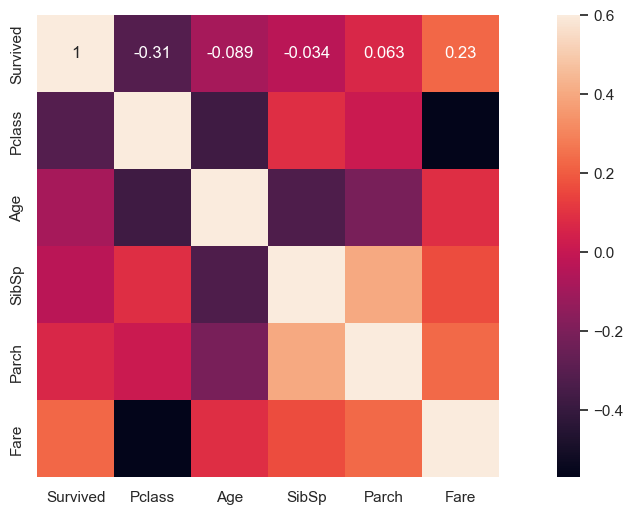

In [42]:
plt.figure(figsize=(15,6))
sns.heatmap(train.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'],axis=1).corr(), vmax=0.6, square=True, annot=True)

## Выделение признаков (Feature Extraction) <a class="anchor" id="title2"></a>

В этом разделе, мы выбираем соответствущие признакова для тренировки классификатора. Здесь, мы создадим новые признаки, основываясь на существующихю. Также мы приведем категориальные признаки к числовому виду.

#### Признак Обращения

Если посмотреть на то, как заданы имена в датасете, то можно заметить, что имена предворяются обращениями/титулами (напр. *Mr.*, *Dr.*, *Ms.*, и т.д.). Это может добавить доп. информации о персоне - статус, положение в обществе и пр., по крайней мере, как они были записаны в билетах. Давайте начнем с того, что извлечем "Обращения" из столбцов имен (колонка *Name*).


In [44]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


Как можно видеть выше. мы добавили новый столбец *Title* в обучающий датасет и заполнили его значениями из поля *Name*.

In [46]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Col,0,2
Don,0,1
Dr,0,5
Lady,1,0
Major,0,2
Master,0,27
Miss,153,0
Mlle,1,0
Mme,1,0


Количество пассажиров в уникальным Обращениями показаны выше.

Теперь заменим некоторые не столь широко используемые Обращения значением "Other".

In [47]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.518519
1,Miss,0.716129
2,Mr,0.162162
3,Mrs,0.778947
4,Other,0.375000


После этого мы конвертируем категориальный признак *Title* в числовой вид. Для этого строим таблицу соответствий:

| Категориальный признак | Значение|
| ------------- |-------------|
| Mr | 1 |
| Miss | 2 |
| Mrs | 3 |
| Master | 4 |
| Other | 5 |

```.map()``` реализует такой маппинг следующим образом:

In [48]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


#### Sex 

Конвертируем катгориальное значение *Sex* в численное представление. 0 - предстваляет женский пол, 1 - мужской.

In [50]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


#### Embarked 

В датасетах присутствуют в столбцах *Embarked* пустые значения ("nan"). Есил так их и оставить, либо же заменить на значение "n/a", то оно будет восприниматься алгоритмами наравне с остальными значениями данного признака. ЭТо может быть не совсем корректно, с точки зрения задачи. 

In [52]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

Сначала проверим количество пассажиров для каждой категории *Embarked*.

In [53]:
train.Embarked.value_counts()

Embarked
S    502
C    134
Q     63
Name: count, dtype: int64

Обнаруживаем, что категория "S" содержит максимальное количество пассажиров. Посему, заменяем пустые значения "nan" значением "S".

In [54]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


Теперь можно произвести преобразование и првиести значение *Embarked* к численному виду. Ставим в соответствие 0 - "S", 1 - "C" и 2 - "Q".

In [56]:
for dataset in train_test_data:
    #print(dataset.Embarked.unique())
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1


#### Age

Сначала заполняем все пустые (NULL) значение возраста (*Age*) произвольным числом их диапазона от (mean_age - std_age) и до (mean_age + std_age). 

После создадим новый столбец и назовем его *AgeBand*. Он будет содержать категоризированное значение возраста, распределенное по 5ти разным группам.

In [58]:
for dataset in train_test_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train['AgeBand'] = pd.cut(train['Age'], 5)

print (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.505882
1   (16.0, 32.0]  0.369444
2   (32.0, 48.0]  0.379679
3   (48.0, 64.0]  0.389831
4   (64.0, 80.0]  0.111111


C:\Users\hotf\AppData\Local\Temp\ipykernel_3800\590998002.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
C:\Users\hotf\AppData\Local\Temp\ipykernel_3800\590998002.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
C:\Users\hotf\AppData\Local\Temp\ipykernel_3800\590998002.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and

In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,1,"(32.0, 48.0]"


Теперь ставим в соответствие каждому (*Age*) группу возрастов (*AgeBand*).

>*Цель данной операции* - сократить множество возможных значений возрастов. Иначе это усложнит работу алгоритма, т.к. он (алгоритм) будет вынужден ориентироваться на конкретные значения возрастов при производстве прогнозных значений. Это для задачи не так существенно, т.к. с точки зрения влияние на признак *Survived* м.б. не так важно, сколько лет было пассажиру - 61 или 62 (например).

In [60]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,1,"(32.0, 48.0]"


#### Fare

Заменяем пропущенные значения *Fare* усредненными/медианными значениями *Fare*.

> Здесь и ранее - идея заменять пропущенные значения какими-то усредненными величинами обосновывается стремлением оставить распределение а данных примерно таким же, и не генерировать граничных/экстремальных значений, т.к. подобные выбросы могли бы увести алгоритмы прогнозирования в сторону от реального решения, давая не существующие ориентиры (например если бы мы заменили значение *Fare* - экстремально большим/малым значением по отношению к другим, и *Survived* был бы 1/0, то это дало бы ложный след для алгортимов машинного обучения, что надо увеличивать вес и значимость признака *Fare*, хотя на самом деле просто так совпало)


In [61]:
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

Создаем столбец *FareBand*. Разделяем значения *Fare* на 4 категории.

In [62]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
print (train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

            FareBand  Survived
0    (-0.001, 7.925]  0.239130
1      (7.925, 14.5]  0.281437
2     (14.5, 31.275]  0.448864
3  (31.275, 512.329]  0.583815


C:\Users\hotf\AppData\Local\Temp\ipykernel_3800\744499712.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print (train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())


In [63]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,1,"(16.0, 32.0]","(-0.001, 7.925]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,3,"(32.0, 48.0]","(31.275, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.0, 32.0]","(-0.001, 7.925]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,3,"(32.0, 48.0]","(31.275, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,1,"(32.0, 48.0]","(7.925, 14.5]"


Делаем маппинг между *Fare* и *FareBand*

In [64]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,1,"(16.0, 32.0]","(-0.001, 7.925]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,3,"(32.0, 48.0]","(31.275, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,2,"(16.0, 32.0]","(-0.001, 7.925]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,3,"(32.0, 48.0]","(31.275, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,1,"(32.0, 48.0]","(7.925, 14.5]"


#### SibSp & Parch

[ ] - сделать самостоятельно: создать на базе *SibSp* и *Parch* новый признак, отражающий размер семьи - *FamilySize*.

In [65]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.314010
1           2  0.538462
2           3  0.564706
3           4  0.714286
4           5  0.083333
5           6  0.166667
6           7  0.400000
7           8  0.000000
8          11  0.000000


[ ] - Самостоятельно: проанализировать влияение полученного признака

About data shows that: 

- Having *FamilySize* upto 4 (from 2 to 4) has better survival chance. 
- *FamilySize = 1*, i.e. travelling alone has less survival chance.
- Large *FamilySize* (size of 5 and above) also have less survival chance.

[ ] Самостоятельно - разработать новый признак *IsAlone*. Проанализировать, как значение данного признака влияет на шанс спасения, по сравнению с пассажирами с *FamilySize*.

In [66]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.493007
1        1  0.314010


Что показывает, что путешествующие водиночку имеют лишь 30% шанс на спасение.

In [67]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,1,"(16.0, 32.0]","(-0.001, 7.925]",2,0


In [68]:
test.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",1,1,1,0,PC 17757,3,C62 C64,1,3,2,0


### Отбор признаков

Убираем ненужные столбцы/признаки и сохраняем только те, который будем использовать в эксперименте прогнозирования. Столбец *PassengerId* удаляется только из тренировочного датасета, посколько в Тестовом датасете нужно будет формировать отчет PassengerId - Survived при отправке файла с результатами в Kaggle.

In [69]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)

In [70]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1


In [71]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,701,1,1,1,1,3,1,3,0
1,702,1,1,0,2,2,0,1,1
2,703,0,3,1,1,2,1,2,0
3,704,0,3,0,1,0,2,1,1
4,705,0,3,0,1,0,0,1,0


Снова построим матрицу корреляци признаков

<Axes: >

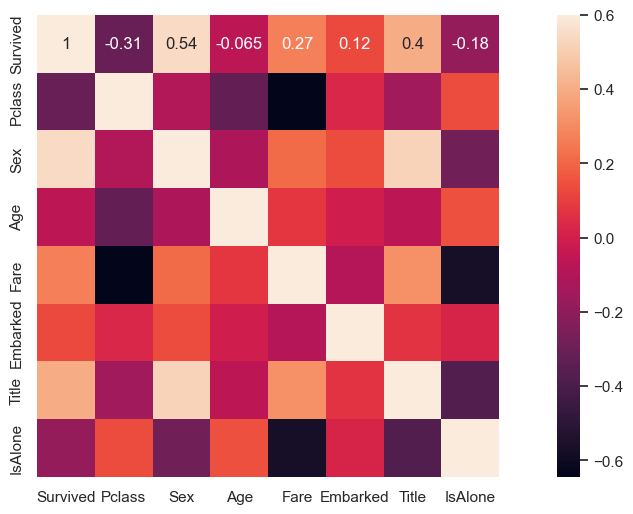

In [72]:
plt.figure(figsize=(15,6))
sns.heatmap(train.corr(), vmax=0.6, square=True, annot=True)

## Моделирование <a class="anchor" id="title3"></a>

В этом разделе проводим моделирование дыннах, строим модели предсказания и пробуем разные алгоритмы. Для каждого из применямых алгоритмов необходимо определить точность его работы на тестовой выборке после обучения на тренировочном наборе. Это даст нам возможность выбрать наиболее подходящий алгоритм/модель для дальнейшей работы и предсказания финальных результатов

### Классификация и Точность

Данная задача относится к классу задач по классификации данных. Т.к. цель предсказания - определить 0 или 1 в зависимости от того, удастся ли спастись пассажиру или нет. Таким образом имеем задачу *бинарной классификации*, когда выбора делается из 2 возможных исходов и необходимо отнести запись в тестовом наборе к одному из двух классов - 0 или 1.

Для начала определим тренировочный и тестовые наборы. Обычно семантика переменных следующая, посколько результат вычисления - это (одна) величина, то на выходе алгоритма мы получим вектор ответов ```y```, определяемый по набору передаваемых признаков (это уже матрица) - ```X```. Т.о. ```y = F(X)```, такая запись справедлива для любых алгоритмов/моделей. Соответственно вводим переменные (новые, полученный копированием данных из существующих загруженных датасетов ```train``` и ```test``` - их мы не трогаем!):
  - ```X_train``` - признаки (те, которые мы решили использовать для обучения) из оригинанльного тренировочного набора
  - ```y_train``` - ответы из оригинального тренировочного набора, соответсвующие признакам ```X_train```
  - ```X_test``` - признаки из тестового набора (это новые записи, которые мы **НЕ** используем в процессе обучения)
  - ```y_test``` - его еще нет, нам как раз и надо его найти 

Размерности и структура ```X_train``` и ```X_test``` должны совпадать, т.к. после проведенного обучения алгоритм ```F(X)``` должен оперировать данными одинакового вида.

In [73]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

y_test = test['Survived']
X_test = test.drop("Survived", axis=1).drop("PassengerId", axis=1)


X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 7), (700,), (191, 7), (191,))

Существует большое количество алгоритмов классификации. Среди них выбираем следующие для решения поставленной задачи:

- Логистическая регрессия (Logistic Regression)
- Метод опорных векторов (Support Vector Machines (SVM))
- Linear SVC
- К-ближайших соседей (k-Nearest Neighbor (KNN))
- Решающие деревья (Decision Tree)
- Random Forest
- Naive Bayes (GaussianNB)
- Perceptron
- Stochastic Gradient Descent (SGD)

Процедура тренировки и проверки выглядит следующим образом:

> Во-первых, тренируем классификаторы на базе тренировочного набора. 
>
> После этого, используя натренированный классификатор, даем прогноз значения *Survival* по тестовым данным.
>
> В конце, рассчитывает метрики точности (accuracy score (in percentange)) натренированного классификатора.

***Замечанеи:*** that the accuracy score is generated based on our training dataset.

In [74]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

### Логистическая регрессия

[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) (or logit regression, or logit model) -- регрессионная модель, где зависимая величиная (DV) является категориальной. Данная статья описывает случай бинарной зависимой величины, где она может применять только 2 значения, "0" и "1", которые представляют ответы вида успешно/нет, выигрыш/проигрыш, живой/мертый или здоровый/больной. Случаи когда зависимая величина имеет более 2 значений могут анализироваться с помощью мультиноминальной логистрического регрессии (multinomial logistic regression), или, если различные категории являются упорядоченными. то с помощью моделт упорядоченного выбора (ordinal logistic regression).

In [75]:
X_test

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,1,1,3,1,3,0
1,1,0,2,2,0,1,1
2,3,1,1,2,1,2,0
3,3,0,1,0,2,1,1
4,3,0,1,0,0,1,0
...,...,...,...,...,...,...,...
186,2,0,1,1,0,5,1
187,1,1,1,2,0,2,1
188,3,1,1,2,0,2,0
189,1,0,1,2,1,1,1


In [76]:
X_test

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,1,1,3,1,3,0
1,1,0,2,2,0,1,1
2,3,1,1,2,1,2,0
3,3,0,1,0,2,1,1
4,3,0,1,0,0,1,0
...,...,...,...,...,...,...,...
186,2,0,1,1,0,5,1
187,1,1,1,2,0,2,1
188,3,1,1,2,0,2,0
189,1,0,1,2,1,1,1


In [77]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' percent')

79.57 percent


### Support Vector Machine (SVM)

[Support Vector Machine (SVM)](https://en.wikipedia.org/wiki/Support_vector_machine), метод опорных векторов - это пример модели обучения с Учителем, используемая для классификационного и регрессионного анализов. Они представляют данные, в виде точек на области, рассатавленных таким образом, что значения из разных категорий явно разделены между собой промежутком как можно наиболее широким. Новые значения (сэмплы из выборок) впоследствии соотносятся с этой областью и прогнозируются на принадлежность к какой-либо из категории, в зависимости от того с какой стороны промежутка они находятся.

Вдополнение к реализации линейной классификции, SVM может эффективно решать задачи нелинейной классификации, используя специальный прием при работе с ядром, явно соотнося входные значения в много-мерное пространство признаков. Предположим, есть некоторые данные (описываемые в виде точек), принаддежающие одному из двух (возможных) классов, цель - определить к какому из двух классов будет принадлежать (новая) точка или сэмпл. В случае метода опорных векторов, точка отображается как $p$-мерный вектор (список из $p$ индексов), и необходимо узнать можем ли мы разделить такие точки с помощью $(p-1)$-мерной гиперплоскостью.

Кто данные не промаркированы (нет label), то обучение с учителем проводить нелья (*естественно!* кэп) и требуется иной подход -- обучение без учителя, с помощью которого делаются попытки найти естественное разделение данных на группы (классы) и затем относить новые данные (=сэмплы, точки) к этим сформированным группам. Алгоритм разделения (кластеризации) который улучшает метод опорных векторов называется - **support vector clustering** и часто используется в промышленном применении и когда данные не размечены или когда только некоторые данные размечены (в результате предобработки например).

В примере кода ниже, [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) реализаует метод опорных векторов для задачи классификации.

In [78]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_svc)

82.86


### Линейный SVM

Линейный SVM -- модель SVM с линейным ядром.

Код ниже [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) реалиазует линейную классификацию через опорные векторы.

In [79]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_linear_svc)

79.0


### $k$ - ближайших соседей

[Алгоритм $k$-ближайших соседей (k-NN)](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) это один из самых простых алгоритмов машинного обучения и используется и как для задачи классификации, так и для задачи регрессии. В обоих случаях, входных данные состояит из $k$ ближайших точек в пространстве признаков. Результаты зависят от того используется ли $k$-NN для задачи классификации или регрессии:

- In *$k$-NN classification*, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its $k$ nearest neighbors ($k$ is a positive integer, typically small). If $k = 1$, then the object is simply assigned to the class of that single nearest neighbor.


- In *$k$-NN regression*, the output is the property value for the object. This value is the average of the values of its $k$ nearest neighbors.

In [80]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (acc_knn)

84.71


### Решающие деревья (или дерево решений, decision tree)

[Дерево решений](https://en.wikipedia.org/wiki/Decision_tree) это струткура похожая на последовательность вычислений в которой каждый вычисляющий узел (нода) содержит некую проверку/сравнение/тест какого-либо атрибута или признака, каждая ветвь представляет результат теста, а каждый лист представляет ответ(class label) - решение, принимаемоем после прохождения всего алгоритма. Путь от корневрого узла (самой первой проверки) до листа представляет собой набор классификационных правил.

In [81]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
print (acc_decision_tree)

87.0


### Случайный лес (random forest)

[Случайный лес](https://en.wikipedia.org/wiki/Random_forest) или **лес случайных решений** - это способ обучения/ссотавления ансабля решений **ensemble learning method** для задач классификации, регрессии и других, который выполнеяет за счет создания множества решеющих деревьев во время обучения и выведения класса, являющегося модой (для задач классификации) или усредненам прогнозом (для задач регрессии), по отдельным деревьям. Леса случайных решений корректируют склонность Деревьев Решений Random соответствовать их обучающему набору (overfitting).

[Методы ассебмлирования](https://en.wikipedia.org/wiki/Ensemble_learning) используют несколько обучающих алгоритмов для получения лучшей эффектвиности прогнозирования, чем можно было бы получить с помощью любого из составляющих алгоритмов обучения.

In [82]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print (acc_random_forest)

87.0


### Gaussian Naive Bayes

[Наивные Байесовские классификаторы](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)(Naive Bayes classifiers) это семейство простых вероятностных классификаторов, в основе которых лежит применение теоремы Байеса со строгим (=наивным) предположением о незаивисимости между признаками.

[Теорема Байеса](https://en.wikipedia.org/wiki/Bayes%27_theorem) описывает веростность события, основываясь на априорном знании условий, которые могут бысть связаны с событием. Например, если заболеваемость раком зависит от возраста, то, следуя теореме Байеса, возраст человека может использоваться для для более точной оценки веростности о наличии рака, по сравнению с оценкой вероятности раки, сделанной без учета (знания) информации о возрасте человека.

Naive Bayes - это простая техника создания классификаторов: модели, которые выбирают ответ (label) для конкртеной задачи, поредставляются как вектора значений признаков, в котором метки классов берутся из какого-либо конечного множества. Это не один алгоритм обучения таких классификаторов, а семейчас алгоритмов, основанных на общем принципе: все наивные классификаторы (Байеса) предполагают, что значение определенного признакок не зависит от значений других признаков, заданного переменной класса. Наприме, фрукт может быть признан яблоком, если он красный, круглый и около 10см в диаметре. Наивный Байесовский классификатор предполагает, что каждый из этих признаков вносит свой независимый вклад в вероятность того, что фрукт это яблоко, в независимости от того есть ли какие-то возможные корреляции между (свойствами) цветом, округленностью, и диаметром.

In [83]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print (acc_gnb)

78.14


### Перцептрон (perceptron)

[Перцептрон](https://en.wikipedia.org/wiki/Perceptron) это вид линейного классификатора, т.е. алгоритма классификации, который дает прогноз, основываясь на линейной функции предсказания, комбинирующей множество весов с вектором признаков (свойств).

In [84]:
clf = Perceptron(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_perceptron = clf.predict(X_test)
acc_perceptron = round(clf.score(X_train, y_train) * 100, 2)
print (acc_perceptron)

77.43


### Стохастический градиентный спуск (SGD)

[Метод стохастического градиентного спуска](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) (часто упоминается сокращенно **SGD**), также известный, как метод инрементного градиентного спуска, это стохастическая апроксимация метода оптимизации градиентного спуска по минимизации целевой функции, которая записывается как сумма дифференциируемых функций. Другими словами, SGD пытается итеративно найти минимумы/максимумуы.

In [85]:
clf = SGDClassifier(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_sgd = clf.predict(X_test)
acc_sgd = round(clf.score(X_train, y_train) * 100, 2)
print (acc_sgd)

70.0


### Матрица неточностей/ошибок (confusion matrix)

[Матрица неточностей](https://en.wikipedia.org/wiki/Confusion_matrix), она же матрица ошибок, это специальная таблица, визуализирующая производительность алгоритма. Каждая строка представляет экземпляры из прогнозируемого класса, а каждый столбец предствляет экземпляры в реальном (настоящем) классе, или наоборот. Название связано с тем, что оно позволяет очень просто увидеть если система путает 2 класса (т.к. неправильно помечает один как другой).

В прогнозной аналитике, таблица ошибок (= confusion matrix), это таблица из 2х строк и 2х столбцов, которая отображает количество ложных срабатываний (false positives), ложных отрицаний (false negatives),верных срабатываний (true positives), и верных отрицаний (true negatives). Это позволяет проводить более детальную аналитику чем просто сравнивать доли корректных классификаций (точность - accuracy). Точность не является надежной метрикой для отображения реальной производительности классификатора, потому что она приведет к вводящим в заблуждение результатам, в случае несбалансированных данных (то есть в тех случаях когда количество наблюдений в разных классых значительно разнинтся). Например, если в наборе было 95 котов и только 5 собак, а какой-то классификаор может классфицировать все наблюдения как "коты". Общая точность будет 95%, но более при более внмиательном рассмотрении окажется, что распонавание проивзодится с 100% точностью для котов и лишь 0% для собак.

> В случае задачи бинарной классификации у нас есть только 2 исхода - Истина или Ложь, они соотносятся с Положительными и Отрицательными ответами. Формулировки могут звучать путано, особенно по-русски, но надо запомнить, что это матрица показывает насколько правильно выбирались (=прогнозировались) значения Класса для образцов по отношению к наперед заданным (=реальным, настоящим) значениям.

Тут представлено иное объяснение матрицы неточностей [Confusion Matrix with example](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/).

$\begin{matrix} & Предсказаны Положительные & Предсказаны Отрицательные \\ Настоящие Положительне & TP & FN \\ Настоящие Отрицательные & FP & TN \end{matrix}$

Для данной задачи (Титаник), трактовка будет следующей: 

>**True Positive (TP):** Классификатор предсказал *Survived (=1)* **и** пассажир действительно *Был Спасен (Survived, =1)*.
>
>**True Negative (TN):** Классификатор предсказал *Not Survived (=0)* **и** пассажиру не удалось спастись *Not Survived*.
>
>**False Postiive (FP):** Классификатор предсказал *Survived* **но** пассжир в действительности не был спасен *Not Survived*.
>
>**False Negative (FN):** Классификатор предсказал *Not Survived* **ноt** пассажир был спасен *Survived*.

Пример кода нижен строит Матрицу Ошибок для предсказаний, сделанных ***Random Forest Classifier*** на данной тренировочной выборке. Это показывает, как много записей были корректно/не корректно предсказаны данными классификатором.

Accuracy: 87 % 



<Axes: >

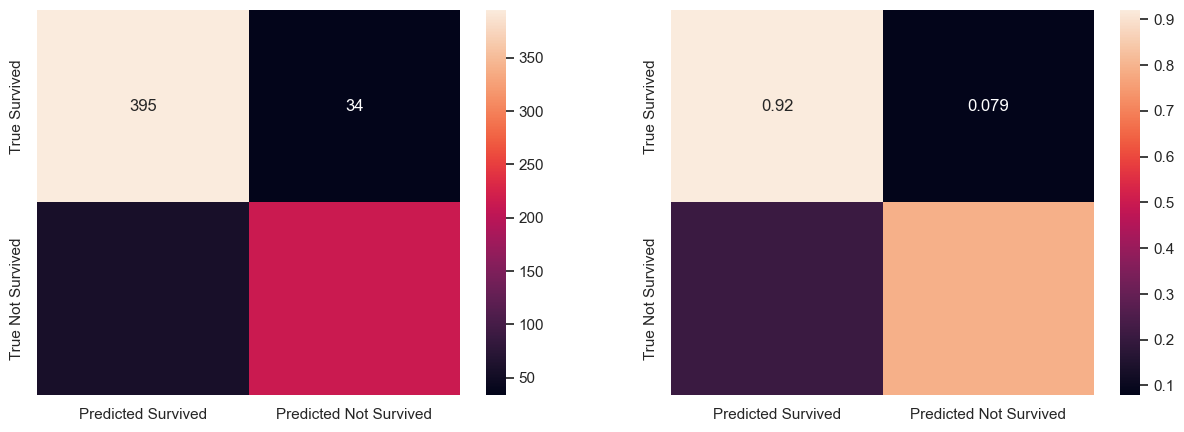

In [86]:
from sklearn.metrics import confusion_matrix
import itertools

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest_training_set = clf.predict(X_train)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Survived', 'Not Survived']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]


true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

Сравним этот результат с каким-нибудь менее удачным.

Accuracy: 77 % 



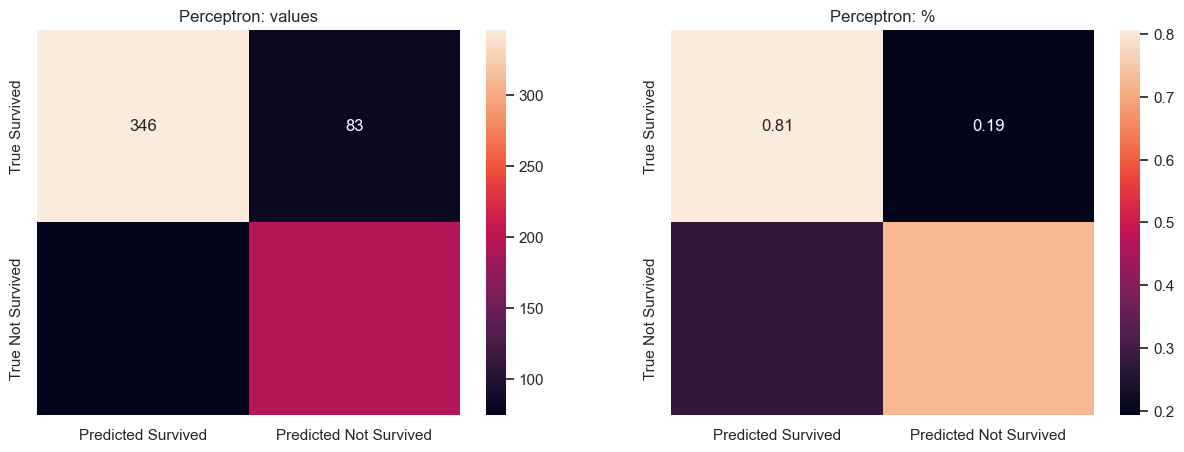

In [87]:
clf = Perceptron(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_perceptron = clf.predict(X_train)
acc_perceptron = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_perceptron)

#class_names = ['Survived', 'Not Survived']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_perceptron)
cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

#true_class_names = ['True Survived', 'True Not Survived']
#predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

ax1 = plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')
ax1.title.set_text('Perceptron: values')

ax2 = plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)
ax2.title.set_text('Perceptron: %')

### Сравнение моделей

Давайте сравним точность всех классификаторов, используемых выше.

In [88]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,87.00
5,Random Forest,87.00
3,KNN,84.71
1,Support Vector Machines,82.86
0,Logistic Regression,79.57
2,Linear SVC,79.00
6,Naive Bayes,78.14
7,Perceptron,77.43
8,Stochastic Gradient Decent,70.00


Из таблицы выше видно, что *Деревья решений (Decision Tree)* и *Лес решений (Random Forest)* имеют наибольший показатель точности.

Для отправки финального решения мы выбираем из этих двоих классификатор *Random Forest* т.к. он может противодействовать или хотя бы ограничить overfitting эффект по сравнению с *Decision Tree* классификатором.

### Сохранение модели


In [89]:
import pickle

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

with open('../models/model.pkl','wb') as f:
    pickle.dump(clf,f)
s = pickle.dumps(clf)